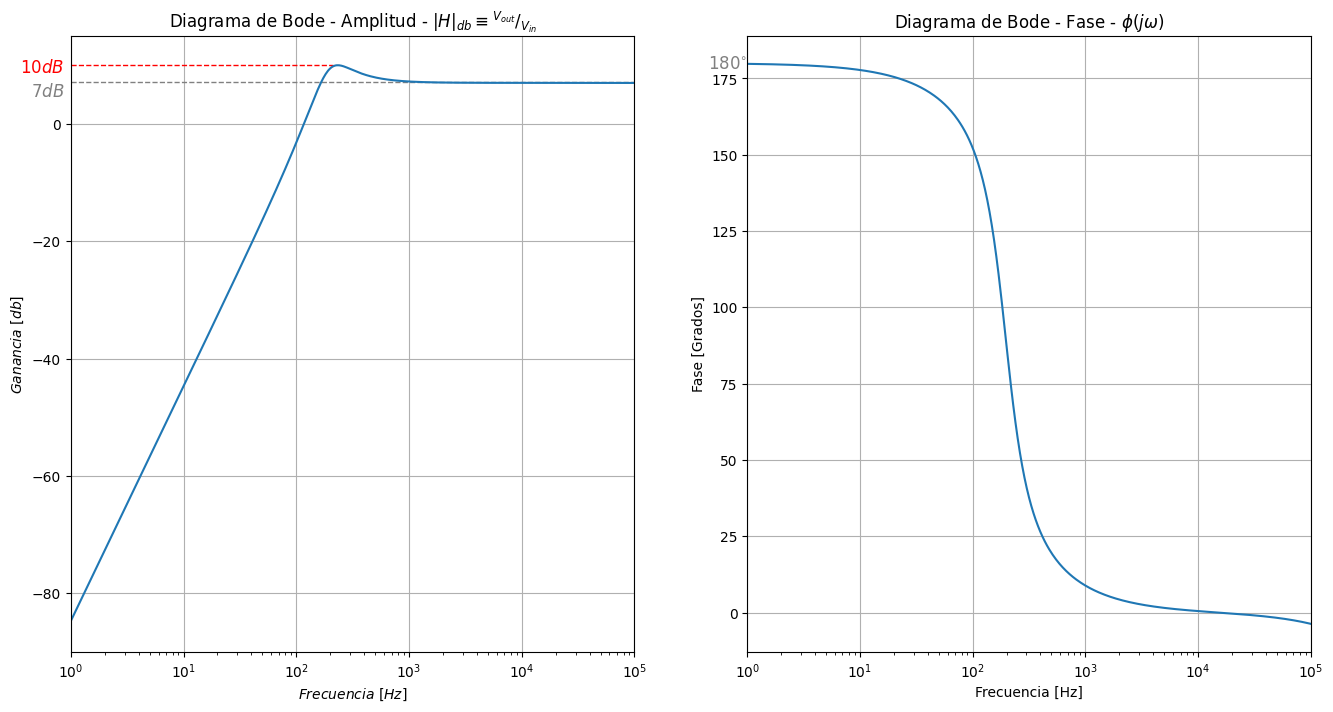

In [49]:
import ltspice
import numpy as np
import matplotlib.pyplot as plt
import os


OMEGA_D = 73.84
ALPHA = 0.19
OMEGA = 85.31
XI = 0.5

# ----------------------------     Graficos del circuito con valores fijos     --------------------------------------


#------------Load the signals from the .raw file
raw_file = 'BODE\\Simulacion_bode.raw'
l = ltspice.Ltspice(raw_file) 
# Make sure that the .raw file is located in the correct path
l.parse()
#-----------------------------------------------

#Parameters for the circuit
Fs = 2.5
Ts = 1/Fs

#----------------------------Obtain basic signals
frequency = l.get_frequency()
Vout = l.get_data('V(vout)')
Vin = l.get_data('V(vin)')
VoutDB = 20 * np.log10(Vout / Vin)
phase = np.angle(Vout, deg = True)
#-------------------------------------------------


#Set max and min Voltages and currents
frequency_begin = 1
frequency_end = 100E3
gain_begin = -90
gain_end = 15


# Module plot
fig = plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
plt.axhline(y = 7.05, linestyle='--', linewidth = 1,color='grey')
plt.text(1, 7.05, r"$7dB$  ", ha='right', va='top', rotation='horizontal', color = 'grey', fontsize = 12)
plt.plot([1, 210], [10, 10], linestyle = '--', linewidth = 1,  color = 'red')
plt.text(1, 8, r"$10dB$  ", ha='right', va='bottom', rotation='horizontal', color = 'red', fontsize = 12)
plt.semilogx(frequency, VoutDB)
plt.title("Diagrama de Bode - Amplitud - $|H|_{db} \equiv  ^{V_{out}}/_{V_{in}}$")       #title
plt.xlabel("$Frecuencia\ [Hz]$")
plt.ylabel("$Ganancia\ [db]$")

plt.xlim(frequency_begin, frequency_end)
plt.ylim(gain_begin, gain_end)
plt.grid()

# Fase plot
plt.subplot(1, 2, 2)
plt.semilogx(frequency, phase)
plt.text(1, 180, r"$180^{\circ}$", ha='right', va='center', rotation='horizontal', color = 'grey', fontsize = 12)
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Fase [Grados]')
plt.xlim(frequency_begin, frequency_end)
plt.grid(True)
plt.title("Diagrama de Bode - Fase - $ \phi (j \omega) $")

plt.savefig('Bode Altium.pdf', format='pdf')
plt.show()
